# Dimensionality Reduction

In this notebook, we test various dimensionality reduction methods for the purpose of reducing high dimension image data to lower dimensions for use with PBO-PES.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import umap
import umap.plot
%matplotlib notebook

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
umap.plot.output_notebook()

Loading BokehJS ...

## 1. UMAP

### MNIST digits

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_data = np.reshape(x_train, [x_train.shape[0], -1])

In [4]:
reducer = umap.UMAP()
mapper = reducer.fit(x_data)

<IPython.core.display.Javascript object>


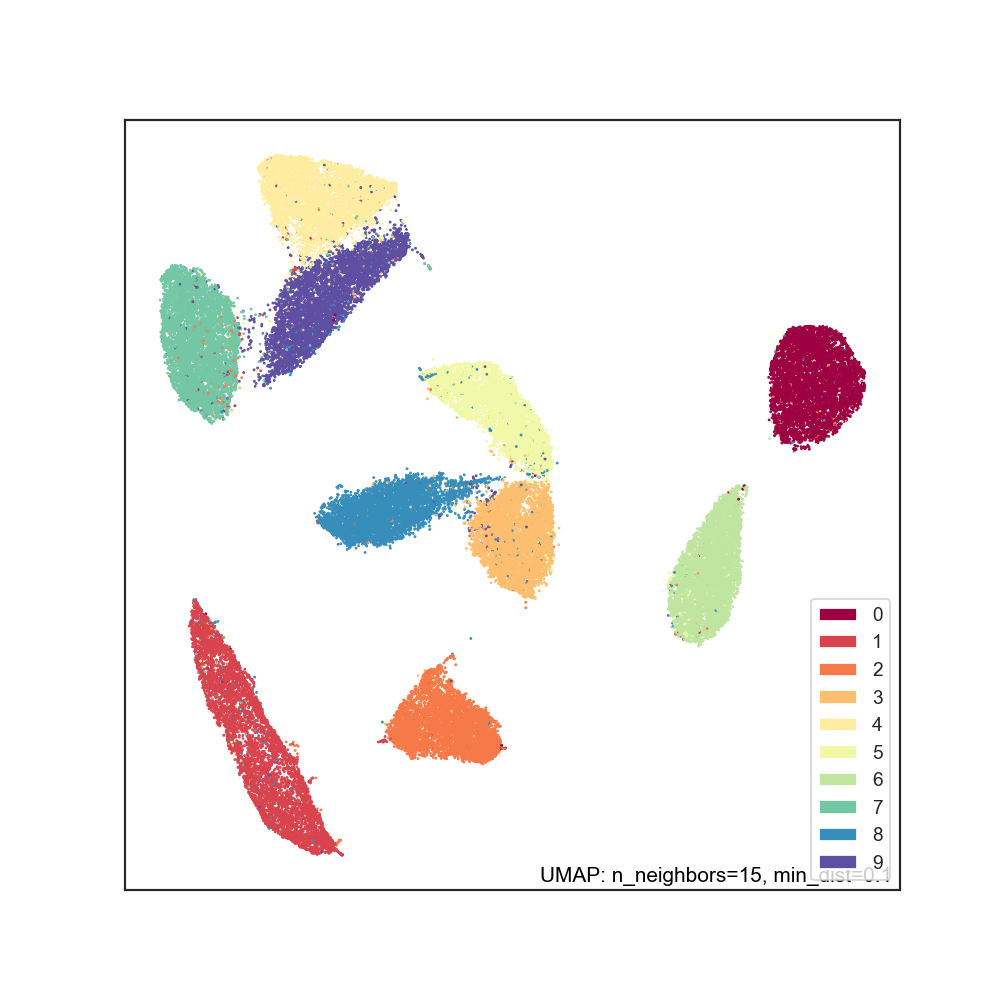

In [5]:
ax = umap.plot.points(mapper, labels=y_train)

In [6]:
hover_data = pd.DataFrame({'index':np.arange(x_data.shape[0]),
                           'label':y_train})

In [7]:
p = umap.plot.interactive(mapper, labels=y_train, hover_data=hover_data, point_size=2)
umap.plot.show(p)

3 dimensions:

In [8]:
reducer = umap.UMAP(n_components=3)
mapper = reducer.fit(x_data)

In [9]:
u = reducer.transform(x_data)

<IPython.core.display.Javascript object>


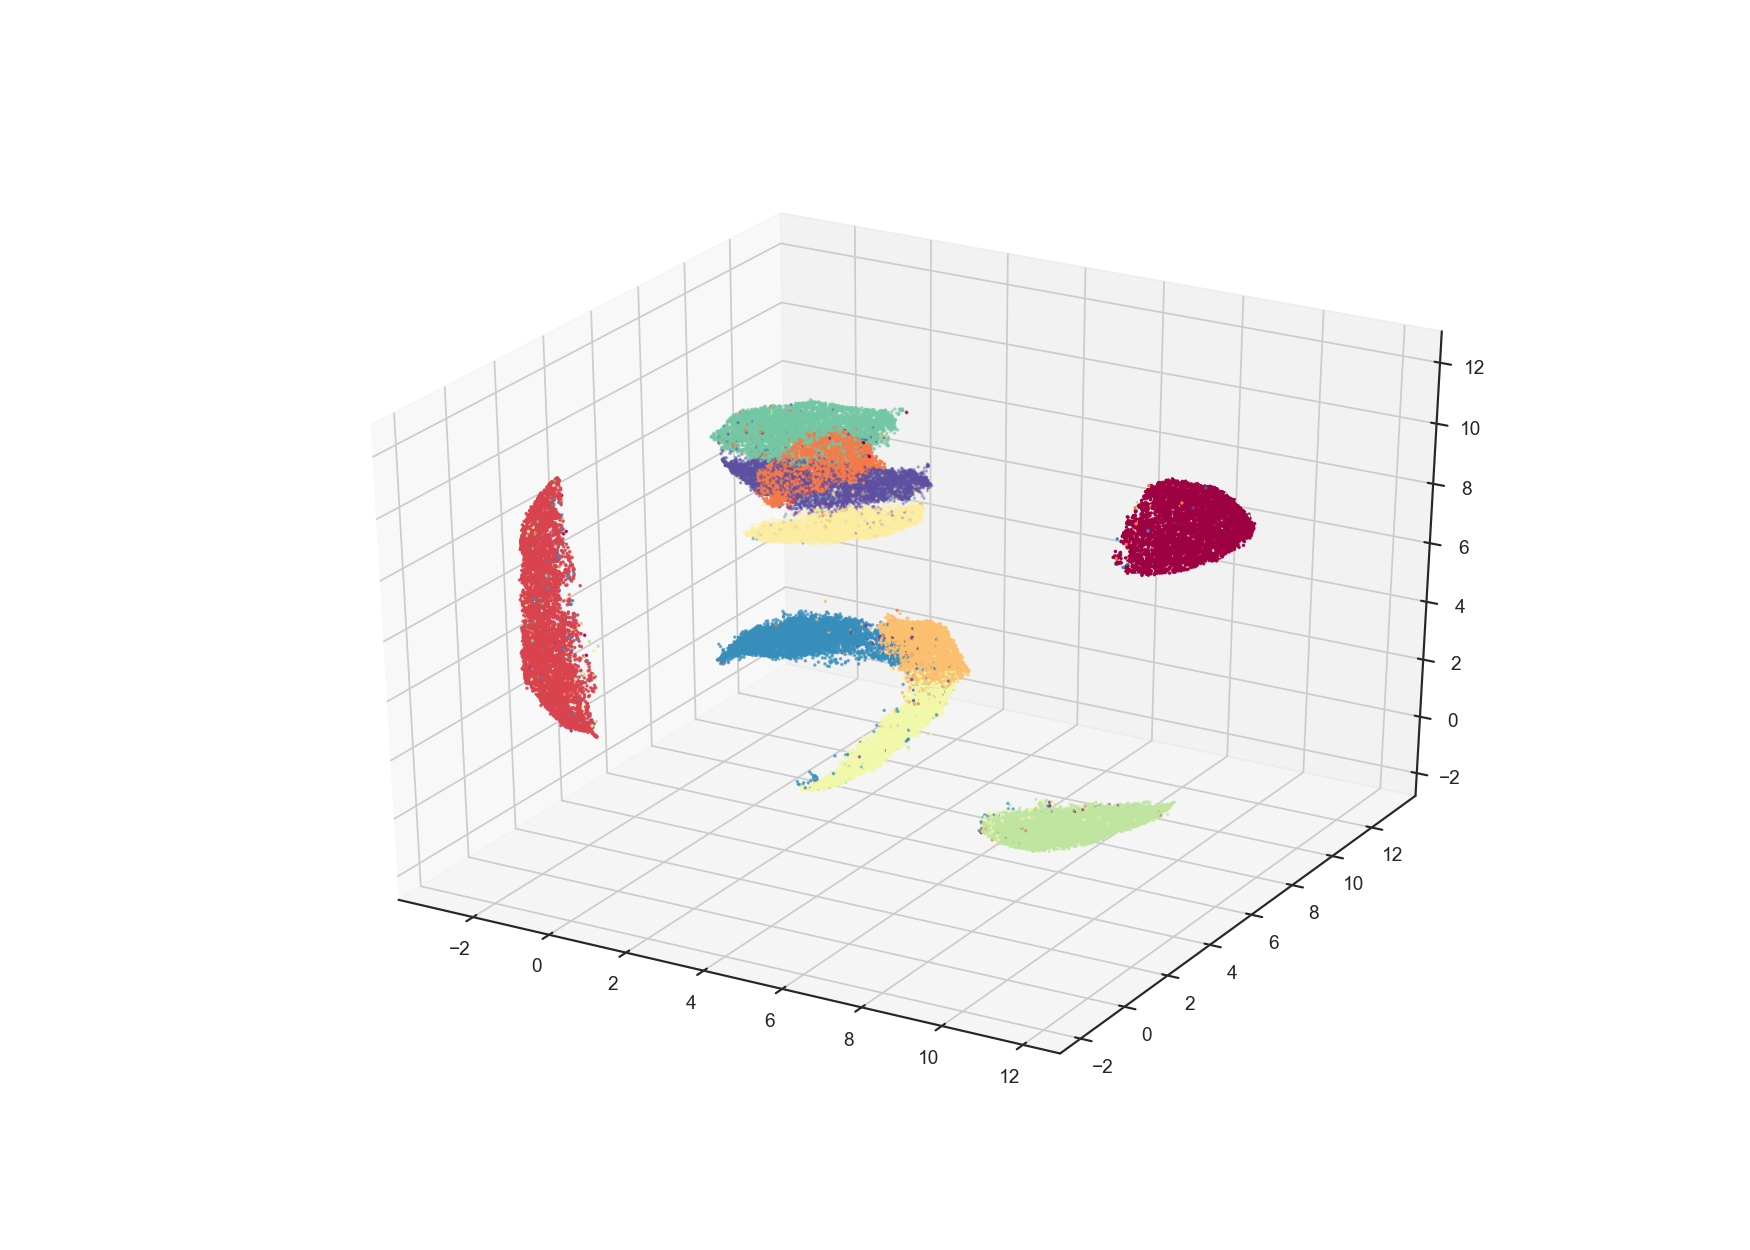

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:, 0], u[:, 1], u[:, 2], c=y_train, cmap="Spectral", s=1)
plt.show()

### CIFAR-10

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_data = np.reshape(x_train, [x_train.shape[0], -1])

In [12]:
reducer = umap.UMAP()
mapper = reducer.fit(x_data)

<IPython.core.display.Javascript object>


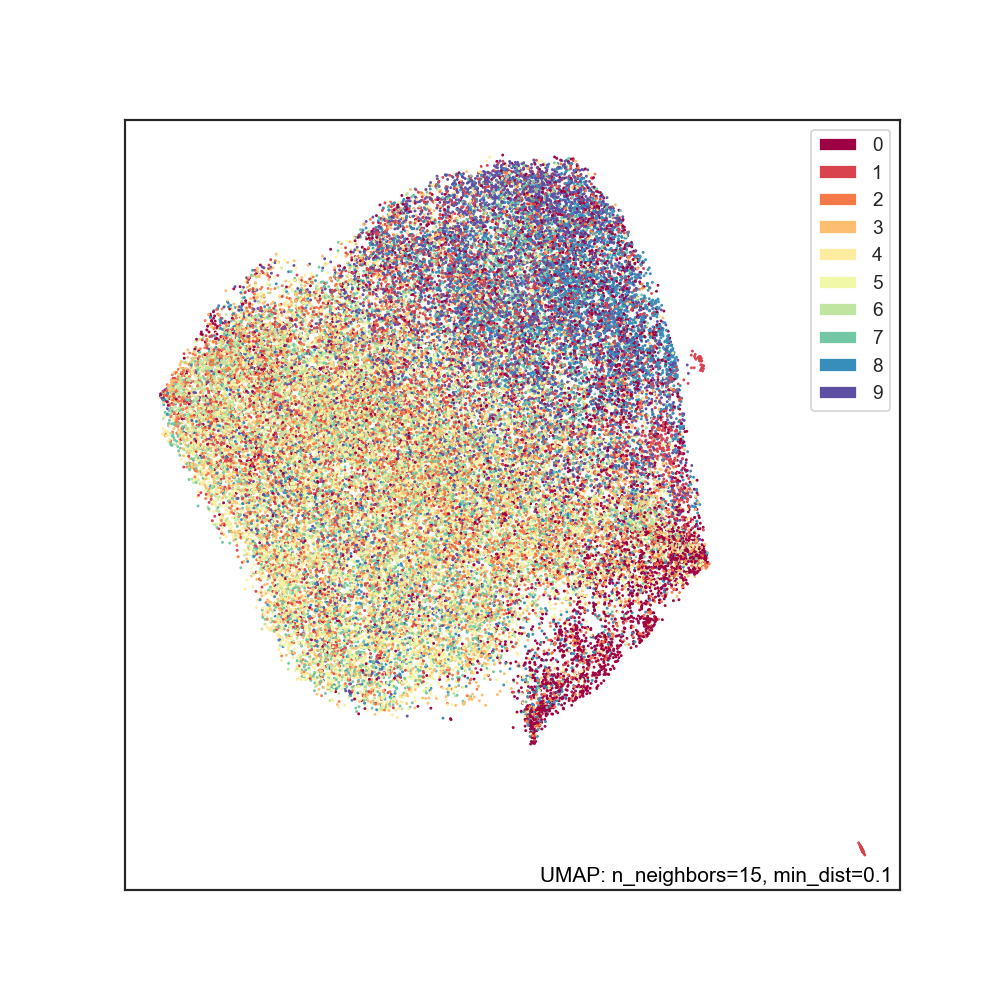

In [13]:
ax = umap.plot.points(mapper, labels=y_train.squeeze())

In [14]:
hover_data = pd.DataFrame({'index':np.arange(x_data.shape[0]),
                           'label':y_train.squeeze()})

In [15]:
p = umap.plot.interactive(mapper, labels=y_train.squeeze(), hover_data=hover_data, point_size=2)
umap.plot.show(p)

3 dimensions:

In [16]:
reducer = umap.UMAP(n_components=3)
mapper = reducer.fit(x_data)

In [17]:
u = reducer.transform(x_data)

<IPython.core.display.Javascript object>


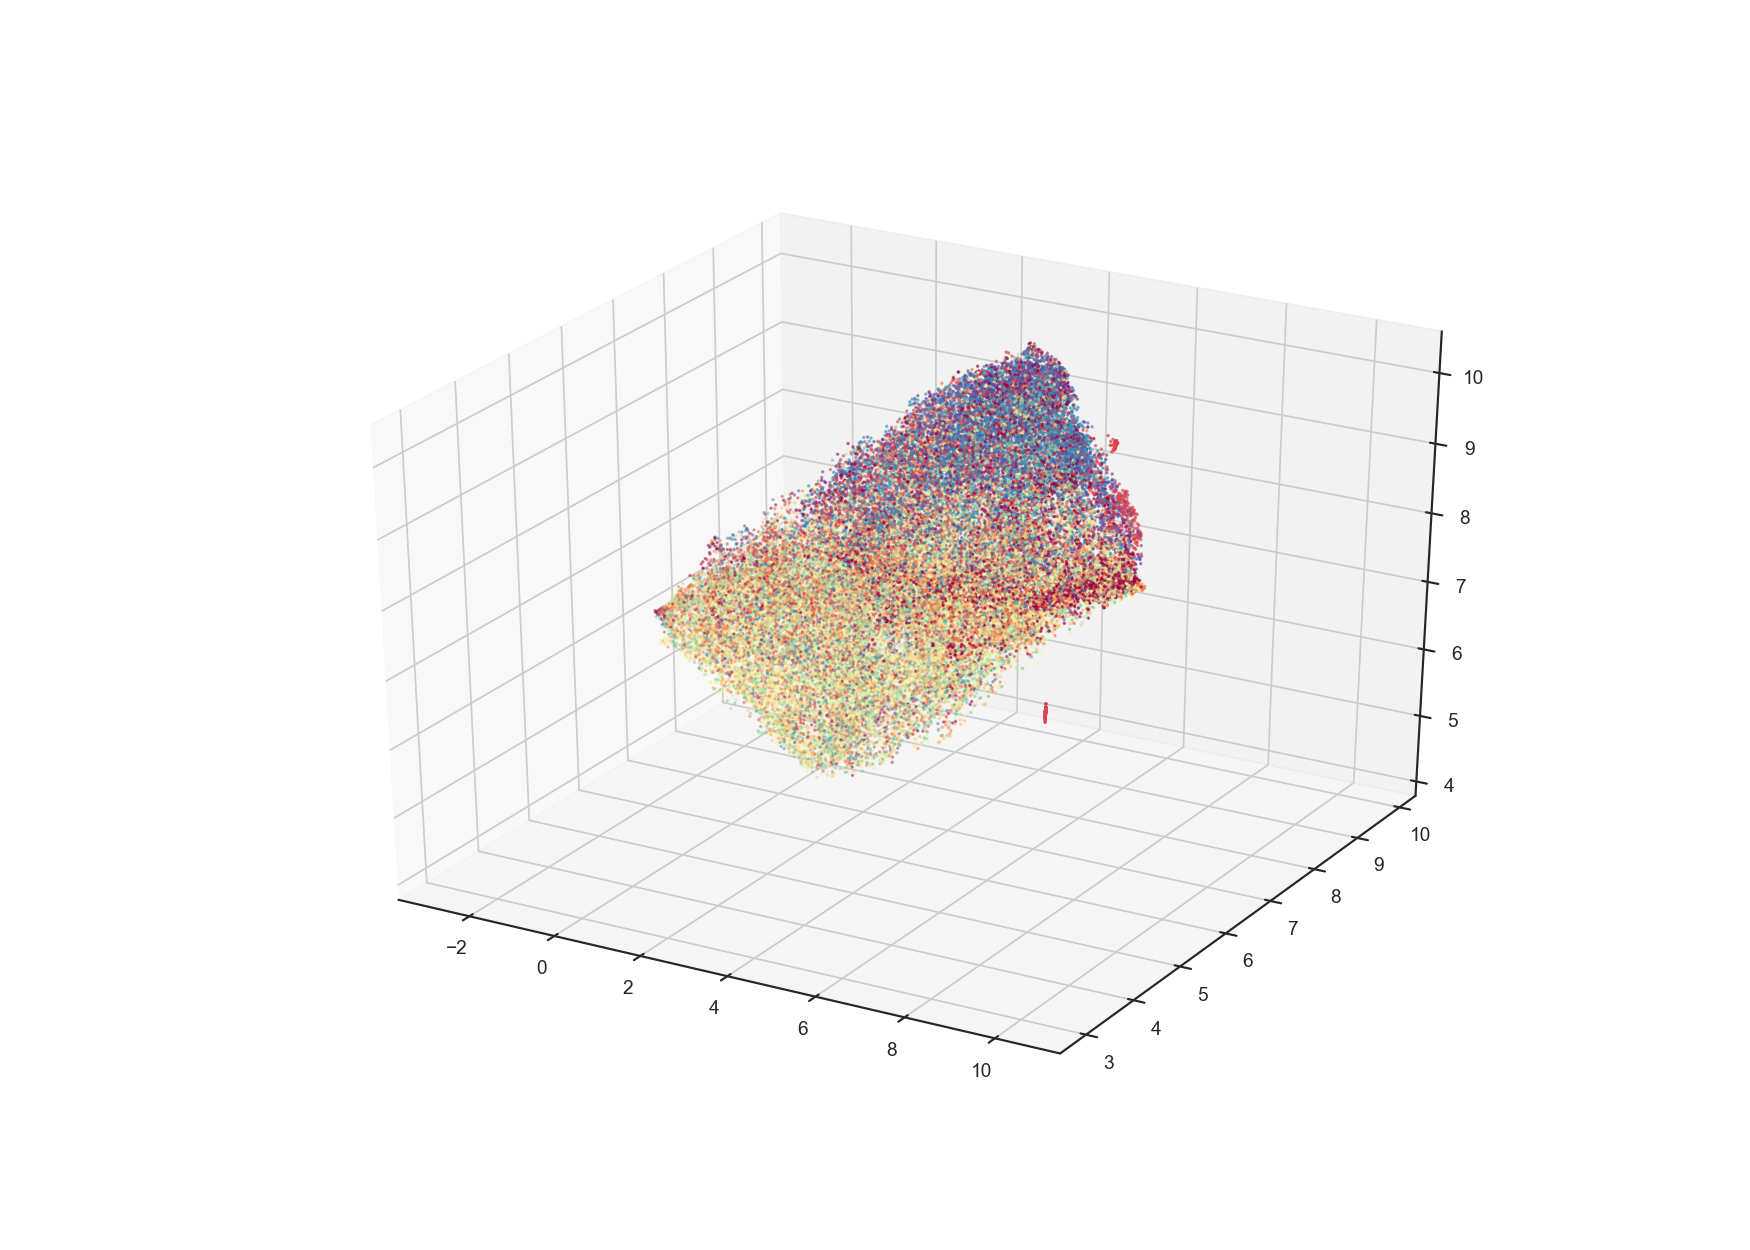

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:, 0], u[:, 1], u[:, 2], c=y_train.squeeze(), cmap="Spectral", s=1)
plt.show()